# Shuffle 10 % of MNIST labels

In [1]:
import torch
import numpy as np
np.seed = 1101

SAVE = False # set this as True if you need

In [2]:
import os
ROOT = '/home/ansuini/repos/WellTemperedSGD/MNIST'
RES  = ROOT + '/data_shuffled/'
os.chdir(ROOT)

In [3]:
train = torch.load(ROOT + '/data/MNIST/processed/training.pt')
test  = torch.load(ROOT + '/data/MNIST/processed/test.pt')

In [4]:
train = list(train)
test = list(test)
train_labels = train[1]
test_labels = test[1]

In [5]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
test[0].shape

torch.Size([10000, 28, 28])

In [7]:
fraction = 0.1
nsamples_train = int(fraction*60000)
nsamples_test = int(fraction*10000)

In [8]:
perm_train = np.random.permutation(train_labels.shape[0])[0:nsamples_train]
perm_test = np.random.permutation(test_labels.shape[0])[0:nsamples_test]

In [9]:
noisy_labels_train = np.random.randint(0,10,nsamples_train)
noisy_labels_test = np.random.randint(0,10,nsamples_test)

In [10]:
new_train_labels = train_labels.clone()
new_test_labels = test_labels.clone()

In [11]:
new_train_labels[perm_train]=torch.tensor(noisy_labels_train)
new_test_labels[perm_test]=torch.tensor(noisy_labels_test)

In [12]:
from matplotlib import pyplot as plt

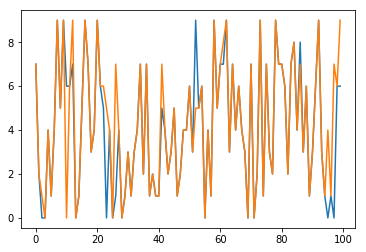

In [13]:
plt.plot(new_test_labels.numpy()[0:100])
plt.plot(test_labels.numpy()[0:100])

In [14]:
train[1] = new_train_labels
test[1] = new_test_labels

In [15]:
test[1]

tensor([7, 2, 0,  ..., 4, 5, 6])

In [16]:
train = tuple(train)
test  = tuple(test)

if SAVE:
    torch.save(train, ROOT + '/data_shuffled/MNIST/processed/training.pt')
    torch.save(test,  ROOT + '/data_shuffled/MNIST/processed/test.pt')

NameError: name 'SAVE' is not defined

# Create subset of the training set (shuffled)

In [ ]:
train = torch.load(ROOT + '/data_shuffled/MNIST/processed/training.pt')

In [ ]:
train = list(train)
train_labels = train[1]

In [ ]:
print(train[0].shape)
print(train_labels.shape)

In [ ]:
train[0] = train[0][0:6000,:,:]

In [ ]:
train_labels = train_labels[0:6000]

In [ ]:
print(train[0].shape)
print(train_labels.shape)

In [ ]:
train[1] = train_labels

In [ ]:
train = tuple(train)

In [ ]:
if SAVE:
    torch.save(train, ROOT + '/data_shuffled_subset/MNIST/processed/training.pt')

In [ ]:
train = torch.load(ROOT + '/data_shuffled_subset/MNIST/processed/training.pt')

In [ ]:
train[0].shape

In [ ]:
train[1].shape